<a href="https://colab.research.google.com/github/seeedata/OUTTA-AI-BOOTCAMP/blob/main/0720%20Crawling_Practice%26HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#BeautifulSoup을 이용한 정적 웹페이지 크롤링

In [ ]:
from bs4 import BeautifulSoup
import requests
import re

#1. 링크를 request.get으로 가져오기 (header가 필요한 경우 headers 입력)
res = requests.get("https://www.gmarket.co.kr/n/best")

#2. BeautifulSoup을 이용해 파싱하기
soup = BeautifulSoup(res.content, 'html.parser')

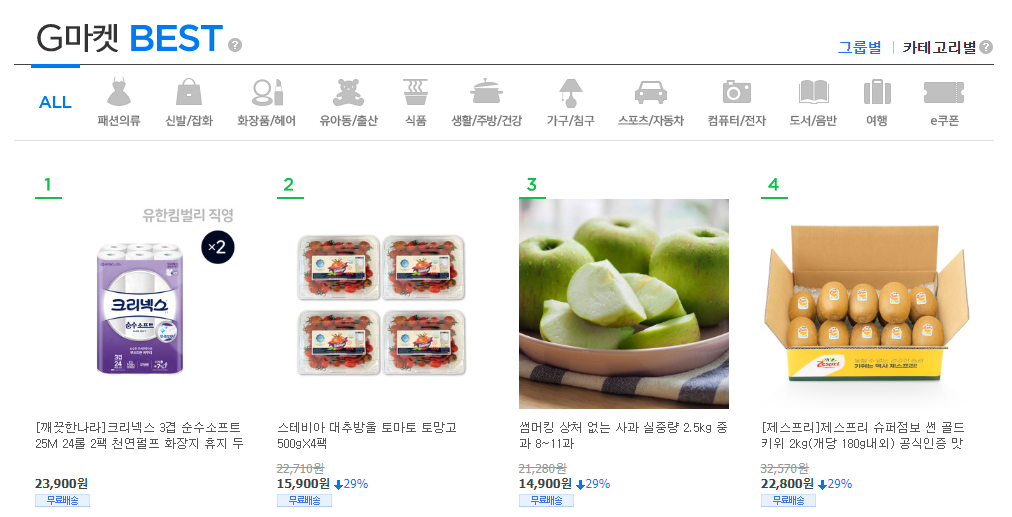

In [ ]:
res

<Response [200]>

In [ ]:
res.content

b'<!DOCTYPE html><html lang="ko" class="no-js"><head><meta name="viewport" content="width=980"/><meta charSet="utf-8"/><meta http-equiv="X-UA-Compatible" content="ie=edge"/><meta name="description" content="\xec\x9d\xb8\xed\x84\xb0\xeb\x84\xb7\xec\x87\xbc\xed\x95\x91,\xec\x98\xa4\xed\x94\x88\xeb\xa7\x88\xec\xbc\x93,\xed\x8c\xa8\xec\x85\x98/\xeb\xb7\xb0\xed\x8b\xb0,\xeb\x94\x94\xec\xa7\x80\xed\x84\xb8,\xec\x8b\x9d\xed\x92\x88/\xec\x9c\xa0\xec\x95\x84,\xec\x8a\xa4\xed\x8f\xac\xec\xb8\xa0/\xec\x9e\x90\xeb\x8f\x99\xec\xb0\xa8,\xec\x83\x9d\xed\x99\x9c\xec\x9a\xa9\xed\x92\x88,\xeb\x8f\x84\xec\x84\x9c/DVD,\xec\x97\xac\xed\x96\x89/\xed\x95\xad\xea\xb3\xb5\xea\xb6\x8c,e\xec\xbf\xa0\xed\x8f\xb0/\xed\x8b\xb0\xec\xbc\x93,\xeb\xa7\x8c\xed\x99\x94/\xea\xb2\x8c\xec\x9e\x84,\xea\xb3\xb5\xeb\x8f\x99\xea\xb5\xac\xeb\xa7\xa4,\xea\xb2\xbd\xeb\xa7\xa4,\xec\xa4\x91\xea\xb3\xa0,\xea\xb8\x80\xeb\xa1\x9c\xeb\xb2\x8c\xec\x87\xbc\xed\x95\x91,\xeb\xb8\x8c\xeb\x9e\x9c\xeb\x93\x9c\xec\x83\xb5,\xeb\xb2\xa0\xec\x8a\x

In [ ]:
soup

<!DOCTYPE html>
<html class="no-js" lang="ko"><head><meta content="width=980" name="viewport"/><meta charset="utf-8"/><meta content="ie=edge" http-equiv="X-UA-Compatible"/><meta content="인터넷쇼핑,오픈마켓,패션/뷰티,디지털,식품/유아,스포츠/자동차,생활용품,도서/DVD,여행/항공권,e쿠폰/티켓,만화/게임,공동구매,경매,중고,글로벌쇼핑,브랜드샵,베스트셀러,방문쇼핑몰,G스탬프,할인쿠폰,동영상,이벤트 등 G마켓" name="description"/><meta content="베스트100,베스트셀러,경매,할인쿠폰,베스트셀러,공동구매,컴퓨터/핸드폰,에어컨/TV/디카,MP3/게임,패션/명품/브랜드,여성의류/속옷,남성의류/정장/빅사이즈,분유/기저귀/식품/생리대/임부복,유아동/장난감,쌀/과일/한우/생선,건강식품/음료,화장품/자동차,스포츠/다이어트,골프/등산/스키/낚시,운동화,네비게이션,리빙/침구/인테리어,애완/성인/공구,꽃배달,도서/여행/항공권,만화" name="keywords"/><meta content="https://www.gmarket.co.kr/n/best" name="msapplication-starturl"/><meta content="Gmarket" property="og:site_name"/><meta content="G마켓 베스트" property="og:title"/><meta content="website" property="og:type"/><meta content="https://www.gmarket.co.kr/n/best" property="og:url"/><meta content="http://pics.gmarket.co.kr/mobile/single/kr/common/sns/gmarket_sns.png" property="og:image"/><link href="https://www.gmarket.

## 상품명 크롤링

select_one 함수는 주어진 것과 매칭되는 데이터 하나만 추출

In [ ]:
soup.select_one('#gBestWrap > div.best-list > ul > li:nth-child(1) > a')  #'#':id

<a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=3075341378&amp;ver=20230805">[CGV](CGV) G마켓 예매권(금요특가_8/4)</a>

In [ ]:
soup.select_one('#gBestWrap > div.best-list > ul > li:nth-child(2) > a')

<a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=1687622836&amp;ver=20230805">[맥심]카누 미니 마일드 120Tx2개 +5Tx2</a>

select 함수는 주어진 것과 매칭되는 데이터 모두 추출해 리스트 형태로 반환

In [ ]:
soup.select('a.itemname')  #'.': class

[<a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=3075341378&amp;ver=20230805">[CGV](CGV) G마켓 예매권(금요특가_8/4)</a>,
 <a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=1687622836&amp;ver=20230805">[맥심]카누 미니 마일드 120Tx2개 +5Tx2</a>,
 <a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=3081745789&amp;ver=20230805">아디다스 360 에어무빙 에센셜 브라팬티 4세트 (브라/팬티 8종)</a>,
 <a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=1804461100&amp;ver=20230805">[피죤]고농축 향균섬유유연제 보타닉 2L 2+1개(향3종택)+보타닉50mlx3종/특가15900원</a>,
 <a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=3075225138&amp;ver=20230805">[메가박스](유니버스클럽 전용 쿠폰적용가 5천원) 메가박스 일반예매권 2D-주중/주말</a>,
 <a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=1621512587&amp;ver=20230805">[맥심]카누미니 아이스 아메리카노 100T x2+밀리아텀블러x2+카누5Tx2추가증정</a>,
 <a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=2820936613&amp;ver=20230805">[블루독](신세계센텀점)(23년 신상품)23175-334-02(MG)프레피 맨투맨 (

In [ ]:
print(type(soup.select('a.itemname')))
print(len(soup.select('a.itemname')))

print(soup.select('a.itemname')[0])
print(soup.select('a.itemname')[-1])

<class 'bs4.element.ResultSet'>
200
<a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=3075341378&amp;ver=20230805">[CGV](CGV) G마켓 예매권(금요특가_8/4)</a>
<a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=3040806739&amp;ver=20230805">[헤네스]((1+1)) 물놀이 야외활동 자외선차단 성인 플랩캡</a>


In [ ]:
#item_list 변수에 저장
item_list = soup.select('a.itemname')

get_text()는 각 객체에 대해 text만 가져와줌

In [ ]:
item_list[0].get_text()

'[CGV](CGV) G마켓 예매권(금요특가_8/4)'

In [ ]:
#item_list의 모든 객체에 대해 get_text()를 하고 또 다른 리스트에 저장

title_list = list()

for item in item_list:
  title_list.append(item.get_text())

In [ ]:
title_list

['[CGV](CGV) G마켓 예매권(금요특가_8/4)',
 '[맥심]카누 미니 마일드 120Tx2개 +5Tx2',
 '아디다스 360 에어무빙 에센셜 브라팬티 4세트 (브라/팬티 8종)',
 '[피죤]고농축 향균섬유유연제 보타닉 2L 2+1개(향3종택)+보타닉50mlx3종/특가15900원',
 '[메가박스](유니버스클럽 전용 쿠폰적용가 5천원) 메가박스 일반예매권 2D-주중/주말',
 '[맥심]카누미니 아이스 아메리카노 100T x2+밀리아텀블러x2+카누5Tx2추가증정',
 '[블루독](신세계센텀점)(23년 신상품)23175-334-02(MG)프레피 맨투맨 (정상가72000)',
 '[디스커버리](대구신세계)디스커버리 운동화 블리 DXSH3222N 스니커즈 슈즈 남녀공용 트래블 워킹화',
 '[맥심]카누 미니 다크 120Tx2개 +5Tx2',
 '[애경]주방세제 항균 트리오 14kg (말통)',
 '[구글플레이]기프트코드 10만원 / 구글 기프트카드',
 '[퓨어닷]퓨어닷 소독티슈 10팩 세트 30매 식약처허가',
 '가정식 생포기김치10Kg 맛없다면 무료반품/배추김치/반찬',
 '[타미힐피거] 코어 플래그 로고 반팔티 5종 택 1',
 '[해태제과]해태제과 띵동 푸드트럭',
 '[네파 키즈](롯데백화점)에센셜 트레이닝 세트 KJC5901',
 '1+1 호신용 삼단봉 강철재질 경찰봉 방어용진압봉 49cm',
 '[하겐다즈]하겐다즈 파인트 아이스크림 3개 골라담기',
 '미미의밥상 감자탕 4.7kg+라면사리+겨자참소스/국내산등뼈/실온보관',
 '최상급 등갈비 로인립(바베큐용/쪽갈비용) 1kg+1kg (총2kg) 무료배송',
 '짜지않고 맛있는 국내산 멸치 고바멸치(조림안주용) 1.5kg',
 '더자인 샤인머스켓 1kg 고당도 경북 경산 1kg 2수 에어포장 (최종가 20610)',
 '[맥심](행사상품)N 동서식품맥심모카골드믹스230T 2760G ',
 '과일꾼 딱딱이 백도 복숭아 중과 4kg 15-19과 / 안전포장',
 '[글라스락]양 쉐이커 2개 세트',

## 가격 정보 크롤링

정가 정보 크롤링

In [ ]:
item_list = soup.select('div.o-price')
item_list

[<div class="o-price"><span class="for-a11y">정가</span><span>15,000<!-- -->원</span></div>,
 <div class="o-price"><span class="for-a11y">정가</span><span>44,460<!-- -->원</span></div>,
 <div class="o-price"><span class="for-a11y">정가</span><span>99,000<!-- -->원</span></div>,
 <div class="o-price"><span class="for-a11y">정가</span><span>29,000<!-- -->원</span></div>,
 <div class="o-price"></div>,
 <div class="o-price"><span class="for-a11y">정가</span><span>42,440<!-- -->원</span></div>,
 <div class="o-price"><span class="for-a11y">정가</span><span>32,400<!-- -->원</span></div>,
 <div class="o-price"><span class="for-a11y">정가</span><span>49,500<!-- -->원</span></div>,
 <div class="o-price"><span class="for-a11y">정가</span><span>44,460<!-- -->원</span></div>,
 <div class="o-price"></div>,
 <div class="o-price"><span class="for-a11y">정가</span><span>100,000<!-- -->원</span></div>,
 <div class="o-price"><span class="for-a11y">정가</span><span>22,000<!-- -->원</span></div>,
 <div class="o-price"><span class="for-

In [ ]:
#item_list의 모든 객체에 대해 get_text()를 하고 또 다른 리스트에 저장

original_price_list = list()

for item in item_list:
  original_price_list.append(item.get_text())

In [ ]:
original_price_list

['정가15,000원',
 '정가44,460원',
 '정가99,000원',
 '정가29,000원',
 '',
 '정가42,440원',
 '정가32,400원',
 '정가49,500원',
 '정가44,460원',
 '',
 '정가100,000원',
 '정가22,000원',
 '정가48,500원',
 '정가15,900원',
 '',
 '정가45,000원',
 '정가19,800원',
 '정가32,500원',
 '정가22,500원',
 '정가36,500원',
 '정가26,900원',
 '정가32,710원',
 '',
 '정가31,280원',
 '정가17,000원',
 '정가43,000원',
 '정가30,000원',
 '정가39,330원',
 '정가15,900원',
 '정가21,170원',
 '',
 '정가82,800원',
 '정가49,660원',
 '정가28,500원',
 '정가43,600원',
 '',
 '정가18,880원',
 '',
 '정가22,900원',
 '정가49,000원',
 '',
 '정가50,000원',
 '',
 '정가25,000원',
 '',
 '정가36,300원',
 '정가200,000원',
 '정가36,330원',
 '',
 '정가84,000원',
 '정가21,900원',
 '정가49,900원',
 '',
 '정가33,000원',
 '정가59,340원',
 '',
 '',
 '정가45,000원',
 '정가21,300원',
 '정가41,830원',
 '정가49,000원',
 '',
 '정가39,000원',
 '정가26,500원',
 '정가21,800원',
 '',
 '정가57,800원',
 '정가79,530원',
 '정가10,000원',
 '',
 '정가18,900원',
 '정가26,900원',
 '',
 '정가83,000원',
 '정가12,500원',
 '정가33,900원',
 '정가44,000원',
 '',
 '정가74,000원',
 '정가54,900원',
 '정가26,900원',
 '정가42,000원',
 '정가298,000원',
 '정가30

할인가 정보 크롤링

In [ ]:
item_list = soup.select('div.s-price')
item_list

[<div class="s-price"><span class="for-a11y">할인가</span><strong><span>9,980<!-- -->원</span></strong> <span><span class="sale"></span><em>33<!-- -->%</em></span></div>,
 <div class="s-price"><span class="for-a11y">할인가</span><strong><span>41,800<!-- -->원</span></strong> <span><span class="sale"></span><em>5<!-- -->%</em></span></div>,
 <div class="s-price"><span class="for-a11y">할인가</span><strong><span>89,100<!-- -->원</span></strong> <span><span class="sale"></span><em>10<!-- -->%</em></span></div>,
 <div class="s-price"><span class="for-a11y">할인가</span><strong><span>15,900<!-- -->원</span></strong> <span><span class="sale"></span><em>45<!-- -->%</em></span></div>,
 <div class="s-price"><span class="for-a11y">할인가</span><strong><span>15,000<!-- -->원</span></strong> </div>,
 <div class="s-price"><span class="for-a11y">할인가</span><strong><span>39,900<!-- -->원</span></strong> <span><span class="sale"></span><em>5<!-- -->%</em></span></div>,
 <div class="s-price"><span class="for-a11y">할인가</span

In [ ]:
#item_list의 모든 객체에 대해 get_text()를 하고 또 다른 리스트에 저장

sale_price_list = list()

for item in item_list:
  sale_price_list.append(item.get_text())

In [ ]:
sale_price_list

['할인가9,980원 33%',
 '할인가41,800원 5%',
 '할인가89,100원 10%',
 '할인가15,900원 45%',
 '할인가15,000원 ',
 '할인가39,900원 5%',
 '할인가23,090원 28%',
 '할인가40,100원 18%',
 '할인가41,800원 5%',
 '할인가22,900원 ',
 '할인가95,000원 5%',
 '할인가20,900원 5%',
 '할인가33,900원 30%',
 '할인가15,540원 2%',
 '할인가16,400원 ',
 '할인가32,400원 28%',
 '할인가9,900원 50%',
 '할인가27,590원 15%',
 '할인가22,380원 ',
 '할인가25,500원 30%',
 '할인가18,800원 30%',
 '할인가22,900원 29%',
 '할인가25,750원 ',
 '할인가21,900원 29%',
 '할인가8,500원 50%',
 '할인가12,900원 70%',
 '할인가28,500원 5%',
 '할인가11,800원 69%',
 '할인가10,900원 31%',
 '할인가19,900원 5%',
 '할인가25,920원 ',
 '할인가76,180원 7%',
 '할인가14,900원 69%',
 '할인가19,900원 30%',
 '할인가31,070원 28%',
 '할인가39,900원 ',
 '할인가14,110원 25%',
 '할인가19,900원 ',
 '할인가9,900원 56%',
 '할인가43,610원 11%',
 '할인가65,500원 ',
 '할인가47,500원 5%',
 '할인가13,900원 ',
 '할인가24,300원 2%',
 '할인가22,000원 ',
 '할인가10,900원 69%',
 '할인가190,000원 5%',
 '할인가10,900원 69%',
 '할인가11,000원 ',
 '할인가66,940원 20%',
 '할인가21,800원 ',
 '할인가47,760원 4%',
 '할인가28,500원 ',
 '할인가9,900원 70%',
 '할인가47,920원 19%',
 '할인가15,800원 '

##데이터 프레임으로 저장하고 Excel 파일로 저장하기

In [ ]:
import pandas as pd
pd.DataFrame([title_list, original_price_list, sale_price_list])

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,[CGV](CGV) G마켓 예매권(금요특가_8/4),[맥심]카누 미니 마일드 120Tx2개 +5Tx2,아디다스 360 에어무빙 에센셜 브라팬티 4세트 (브라/팬티 8종),[피죤]고농축 향균섬유유연제 보타닉 2L 2+1개(향3종택)+보타닉50mlx3종/특...,[메가박스](유니버스클럽 전용 쿠폰적용가 5천원) 메가박스 일반예매권 2D-주중/주말,[맥심]카누미니 아이스 아메리카노 100T x2+밀리아텀블러x2+카누5Tx2추가증정,[블루독](신세계센텀점)(23년 신상품)23175-334-02(MG)프레피 맨투맨 ...,[디스커버리](대구신세계)디스커버리 운동화 블리 DXSH3222N 스니커즈 슈즈 남...,[맥심]카누 미니 다크 120Tx2개 +5Tx2,[애경]주방세제 항균 트리오 14kg (말통),...,[미미로린스]대용량 섬유향수/섬유탈취제 500ml 1+1(+행사중),KIHYUN PHOTOBOOK 11월을 담은 순간,[해피바스]해피바스 스마일 바디워시900g 3종세트 유자/체리/자몽,[웅진]빅토리아 청귤+썸머스노우 500ml 20+20개,[애경]케라시스 퍼퓸 체리블라썸 샴푸 1L X3개,[요기요](요기요) 2만원권,시투엠 유아 초등수학 - 플라토 팡세 칸토의 연산 응용연산 수학독해,[마레몬떼](10%중복쿠폰) 미센스外 여름 시즌오프 특가 모음전,[트레블러스] 남여공용 샌들/플립플랍 균일특가 (COLOANE_IVORY_B),[헤네스]((1+1)) 물놀이 야외활동 자외선차단 성인 플랩캡
1,"정가15,000원","정가44,460원","정가99,000원","정가29,000원",,"정가42,440원","정가32,400원","정가49,500원","정가44,460원",,...,"정가19,000원",,,,,,"정가25,200원","정가33,000원",,"정가45,000원"
2,"할인가9,980원 33%","할인가41,800원 5%","할인가89,100원 10%","할인가15,900원 45%","할인가15,000원","할인가39,900원 5%","할인가23,090원 28%","할인가40,100원 18%","할인가41,800원 5%","할인가22,900원",...,"할인가10,950원 42%","할인가35,000원","할인가14,900원","할인가20,900원","할인가20,900원","할인가20,000원","할인가22,680원 10%","할인가9,900원 70%","할인가10,900원","할인가13,500원 70%"


In [ ]:
import pandas as pd

gmarket_df = pd.DataFrame([title_list, original_price_list, sale_price_list]).T #Transpose를 활용하여 간단히 만들 수 있음

gmarket_df.columns = ['상품명', '정가', '판매가']

In [ ]:
gmarket_df

,상품명,정가,판매가
0,[CGV](CGV) G마켓 예매권(금요특가_8/4),"정가15,000원","할인가9,980원 33%"
1,[맥심]카누 미니 마일드 120Tx2개 +5Tx2,"정가44,460원","할인가41,800원 5%"
2,아디다스 360 에어무빙 에센셜 브라팬티 4세트 (브라/팬티 8종),"정가99,000원","할인가89,100원 10%"
3,[피죤]고농축 향균섬유유연제 보타닉 2L 2+1개(향3종택)+보타닉50mlx3종/특...,"정가29,000원","할인가15,900원 45%"
4,[메가박스](유니버스클럽 전용 쿠폰적용가 5천원) 메가박스 일반예매권 2D-주중/주말,,"할인가15,000원"
...,...,...,...
195,[요기요](요기요) 2만원권,,"할인가20,000원"
196,시투엠 유아 초등수학 - 플라토 팡세 칸토의 연산 응용연산 수학독해,"정가25,200원","할인가22,680원 10%"
197,[마레몬떼](10%중복쿠폰) 미센스外 여름 시즌오프 특가 모음전,"정가33,000원","할인가9,900원 70%"
198,[트레블러스] 남여공용 샌들/플립플랍 균일특가 (COLOANE_IVORY_B),,"할인가10,900원"


In [ ]:
re.findall("\d.*원", "할인가 4,920원 2%")

['4,920원']

In [ ]:
def extract_number(x):
    price = re.findall("\d.*원", x) #숫자로 시작해서 원으로 끝나는 패턴을 찾기
    #데이터가 빈 경우가 있으므로 try, except문 사용
    try:
      price_num = price[0].replace("원", "") #replace로 원을 제거
      #천원 아래 가격도 있을 수 있으므로 try, except문 사용
      try:
        price_num = int(price_num.replace(",", "")) #replace로 쉼표까지 제거하고 int로 변환
      except:
        price_num = int(price_num) #아닐 경우 그냥 int로 변환
    except:
      pass
    return price_num if price else None #데이터가 있을 경우 price_num을 반환, 아닐 경우 None을 반환

In [ ]:
gmarket_df['정가'] = gmarket_df['정가'].apply(extract_number)
gmarket_df['판매가'] = gmarket_df['판매가'].apply(extract_number)

In [ ]:
gmarket_df

,상품명,정가,판매가
0,[CGV](CGV) G마켓 예매권(금요특가_8/4),15000.0,9980
1,[맥심]카누 미니 마일드 120Tx2개 +5Tx2,44460.0,41800
2,아디다스 360 에어무빙 에센셜 브라팬티 4세트 (브라/팬티 8종),99000.0,89100
3,[피죤]고농축 향균섬유유연제 보타닉 2L 2+1개(향3종택)+보타닉50mlx3종/특...,29000.0,15900
4,[메가박스](유니버스클럽 전용 쿠폰적용가 5천원) 메가박스 일반예매권 2D-주중/주말,NaN,15000
...,...,...,...
195,[요기요](요기요) 2만원권,NaN,20000
196,시투엠 유아 초등수학 - 플라토 팡세 칸토의 연산 응용연산 수학독해,25200.0,22680
197,[마레몬떼](10%중복쿠폰) 미센스外 여름 시즌오프 특가 모음전,33000.0,9900
198,[트레블러스] 남여공용 샌들/플립플랍 균일특가 (COLOANE_IVORY_B),NaN,10900


In [ ]:
#각 행의 정가 열이 na면 판매가를 대입

def fill_na_with_sales(row):
    if pd.isna(row['정가']):
        return row['판매가']
    else:
        return row['정가']

In [ ]:
gmarket_df['정가'] = gmarket_df.apply(fill_na_with_sales, axis=1)

In [ ]:
gmarket_df['정가'] = gmarket_df['정가'].apply(int)

In [ ]:
gmarket_df

,상품명,정가,판매가
0,[CGV](CGV) G마켓 예매권(금요특가_8/4),15000,9980
1,[맥심]카누 미니 마일드 120Tx2개 +5Tx2,44460,41800
2,아디다스 360 에어무빙 에센셜 브라팬티 4세트 (브라/팬티 8종),99000,89100
3,[피죤]고농축 향균섬유유연제 보타닉 2L 2+1개(향3종택)+보타닉50mlx3종/특...,29000,15900
4,[메가박스](유니버스클럽 전용 쿠폰적용가 5천원) 메가박스 일반예매권 2D-주중/주말,15000,15000
...,...,...,...
195,[요기요](요기요) 2만원권,20000,20000
196,시투엠 유아 초등수학 - 플라토 팡세 칸토의 연산 응용연산 수학독해,25200,22680
197,[마레몬떼](10%중복쿠폰) 미센스外 여름 시즌오프 특가 모음전,33000,9900
198,[트레블러스] 남여공용 샌들/플립플랍 균일특가 (COLOANE_IVORY_B),10900,10900


In [ ]:
gmarket_df.to_excel('gmarket_best_item.xlsx')

# 과제

## **과제 (100점)**

본인이 관심 있는 그룹에 대해서 해당 크롤링을 반복해서 수행하시오. 데이터를 수집하여 excel파일로 저장하시오.



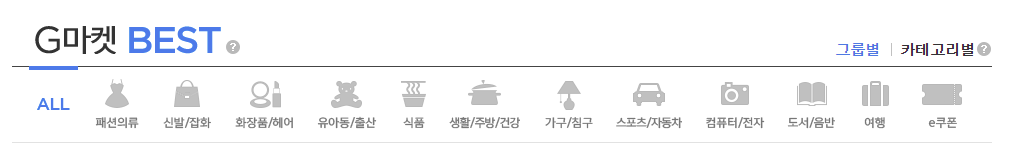

아래에 코드 입력

In [ ]:
#1. 필요한 라이브러리 import 하기 (10점)
from bs4 import BeautifulSoup
import requests
import re

In [ ]:
#2. 링크를 request.get으로 가져오기 (header가 필요한 경우 headers 입력) (10점)
res = requests.get("https://www.gmarket.co.kr/n/best?viewType=G&groupCode=G03&subGroupCode=S011&largeCategoryCode=100000005&mediumCategoryCode=200002353&smallCategoryCode=300024459")

#3. BeautifulSoup을 이용해 파싱하기 (10점)
soup = BeautifulSoup(res.content, 'html.parser')
soup

<!DOCTYPE html>
<html class="no-js" lang="ko"><head><meta content="width=980" name="viewport"/><meta charset="utf-8"/><meta content="ie=edge" http-equiv="X-UA-Compatible"/><meta content="인터넷쇼핑,오픈마켓,패션/뷰티,디지털,식품/유아,스포츠/자동차,생활용품,도서/DVD,여행/항공권,e쿠폰/티켓,만화/게임,공동구매,경매,중고,글로벌쇼핑,브랜드샵,베스트셀러,방문쇼핑몰,G스탬프,할인쿠폰,동영상,이벤트 등 G마켓" name="description"/><meta content="베스트100,베스트셀러,경매,할인쿠폰,베스트셀러,공동구매,컴퓨터/핸드폰,에어컨/TV/디카,MP3/게임,패션/명품/브랜드,여성의류/속옷,남성의류/정장/빅사이즈,분유/기저귀/식품/생리대/임부복,유아동/장난감,쌀/과일/한우/생선,건강식품/음료,화장품/자동차,스포츠/다이어트,골프/등산/스키/낚시,운동화,네비게이션,리빙/침구/인테리어,애완/성인/공구,꽃배달,도서/여행/항공권,만화" name="keywords"/><meta content="https://www.gmarket.co.kr/n/best" name="msapplication-starturl"/><meta content="Gmarket" property="og:site_name"/><meta content="G마켓 베스트" property="og:title"/><meta content="website" property="og:type"/><meta content="https://www.gmarket.co.kr/n/best" property="og:url"/><meta content="http://pics.gmarket.co.kr/mobile/single/kr/common/sns/gmarket_sns.png" property="og:image"/><link href="https://www.gmarket.

In [ ]:
#4. 상품명 크롤링하여 리스트로 저장하기 (20점)
item_list = soup.select('a.itemname')

title_list = list()
for item in item_list:
    title_list.append(item.get_text())

title_list

['[에뛰드] 에뛰드 픽싱틴트 NEW컬러 + 폼클렌저 50ml 증정',
 '[키르시블렌딩] 워터 뮬링 틴트 + 뮬뮬 립글로즈 4g+3.7g 듀오세트 (+체리팩 2매 증정)',
 '[맥퀸뉴욕] 1+1 러빙유 틴트립밤/글로시 립글로즈+틴트',
 '[로쎄앙] 틴트스틱 15colors 1+1 로쎄앙 BEST 지속력 좋은 립 틴트 2개',
 '[토니모리] 퍼펙트 립스 쇼킹 립 / 쇼킹립 4g',
 '[포렌코즈] 타투 끌레르 벨벳 틴트 (전컬러)',
 '[3CE] 3CE VELVET LIP TINT 벨벳 립 틴트',
 '메리쏘드 릴타투 워터틴트',
 '[디올] DIOR 어딕트 립 글로우 오일 6ML 당일배송/디올파우치/쇼핑백',
 '[에스쁘아] 에스쁘아 꾸뛰르 립틴트 블러벨벳',
 '[페리페라] 잉크 무드 글로이 틴트 4g - 광택틴트 최근입고 K',
 '[에뛰드] 디어 달링 워터젤 틴트 NEW 1+1',
 '[헤라] 센슈얼 피팅 글로우틴트 5g (202호 피치플리즈)',
 '[3CE] [쓰리씨이] [3CE]블러 매트 립스틱 (증)블러 워터 틴트 미니(랜덤)',
 '[어뮤즈(뷰티)] 듀 틴트 4g - 고수분 틴트 최근입고 KK',
 '[로쎄앙] 1+1+1 지워지지 않는 틴트 스틱 BEST 컬러',
 '[엘로엘] 엘로엘 블랑루즈 3.5gX4+정사각 스카프',
 '[베네피트] [베네피트][태연 Pick ]베네피트 틴트 6종 중 택1',
 '[패션캣] (패션캣) 1+1 트위스트 벨벳 틴트/본드발색/고밀착',
 '[베네피트] (롯데백화점)(태연pick) 베네피트 틴트 6종 중 택1',
 '[홀리카홀리카] 하트크러쉬 베어 글레이즈 틴트 (2개선택)',
 '[토니모리] 1+1/토니모리 퍼펙트 립스 쇼킹 립 틴트 4g',
 '[어뮤즈] 어뮤즈 젤핏 틴트 3.8g 1호~8호',
 '[맥스클리닉] 플럼핑 립타투팩 틴트',
 '[헤라] (신세계강남점)[SSG단독]NEW 센슈얼 피팅 글로우 틴트+파운데이션5g+파우치 증정',
 '[나어릴때] 롱래스팅 매트 리퀴드 립스틱 14color',
 

In [ ]:
#5. 정가 정보 크롤링하여 리스트로 저장하기 (10점)
item_list = soup.select('div.o-price')

original_price_list = list()
for item in item_list:
  original_price_list.append(item.get_text())

original_price_list

['정가12,000원',
 '정가24,000원',
 '',
 '',
 '정가8,380원',
 '정가11,900원',
 '',
 '정가17,000원',
 '',
 '',
 '',
 '정가11,000원',
 '',
 '정가16,500원',
 '',
 '',
 '정가75,900원',
 '정가29,000원',
 '',
 '정가29,000원',
 '',
 '',
 '',
 '',
 '정가40,000원',
 '정가20,000원',
 '',
 '',
 '',
 '',
 '정가11,900원',
 '정가12,000원',
 '',
 '',
 '',
 '',
 '정가6,900원',
 '정가40,000원',
 '정가5,930원',
 '정가34,000원',
 '정가17,000원',
 '정가15,000원',
 '정가29,000원',
 '',
 '정가19,000원',
 '정가6,340원',
 '',
 '',
 '정가11,900원',
 '정가11,900원',
 '정가17,000원',
 '',
 '정가15,000원',
 '',
 '',
 '',
 '',
 '정가13,000원',
 '',
 '',
 '정가30,000원',
 '정가11,900원',
 '정가10,200원',
 '정가39,000원',
 '정가44,000원',
 '정가12,000원',
 '',
 '',
 '',
 '',
 '',
 '정가11,900원',
 '',
 '',
 '',
 '',
 '',
 '',
 '정가5,930원',
 '',
 '',
 '',
 '',
 '정가23,000원',
 '',
 '',
 '',
 '정가19,800원',
 '',
 '',
 '정가16,000원',
 '정가22,000원',
 '',
 '',
 '',
 '정가6,340원',
 '정가10,330원',
 '정가11,900원',
 '',
 '']

In [ ]:
#6. 할인가 정보 크롤링하여 리스트로 저장하기 (10점)
item_list = soup.select('div.s-price')

sale_price_list = list()
for item in item_list:
  sale_price_list.append(item.get_text())

sale_price_list

['할인가9,600원 20%',
 '할인가14,800원 38%',
 '할인가11,900원 ',
 '할인가10,900원 ',
 '할인가8,300원 ',
 '할인가10,710원 10%',
 '할인가12,700원 ',
 '할인가11,900원 30%',
 '할인가39,900원 ',
 '할인가22,000원 ',
 '할인가5,730원 ',
 '할인가8,800원 20%',
 '할인가30,700원 ',
 '할인가14,690원 10%',
 '할인가10,460원 ',
 '할인가14,900원 ',
 '할인가61,480원 18%',
 '할인가24,650원 15%',
 '할인가15,500원 ',
 '할인가24,650원 15%',
 '할인가28,000원 ',
 '할인가20,150원 ',
 '할인가11,000원 ',
 '할인가22,000원 ',
 '할인가36,000원 10%',
 '할인가9,900원 50%',
 '할인가29,400원 ',
 '할인가26,000원 ',
 '할인가12,900원 ',
 '할인가29,800원 ',
 '할인가9,520원 20%',
 '할인가10,800원 10%',
 '할인가18,990원 ',
 '할인가7,500원 ',
 '할인가20,800원 ',
 '할인가5,500원 ',
 '할인가6,210원 10%',
 '할인가38,000원 5%',
 '할인가5,880원 ',
 '할인가23,800원 30%',
 '할인가14,450원 15%',
 '할인가13,500원 10%',
 '할인가24,650원 15%',
 '할인가13,900원 ',
 '할인가17,860원 6%',
 '할인가6,280원 ',
 '할인가12,000원 ',
 '할인가24,000원 ',
 '할인가10,710원 10%',
 '할인가10,710원 10%',
 '할인가14,450원 15%',
 '할인가11,900원 ',
 '할인가11,900원 20%',
 '할인가11,900원 ',
 '할인가6,000원 ',
 '할인가52,900원 ',
 '할인가8,600원 ',
 '할인가10,900원 16%',
 '할인가10,700원

In [ ]:
#7. 적절히 데이터 전처리를 하여 DataFrame 객체로 만들고 Excel 파일로 저장하기 (30점)
#이때, DataFrame의 열은 "상품명, 정가, 판매가"로 구성되어야 함.

liptint_df = pd.DataFrame([title_list, original_price_list, sale_price_list]).T
liptint_df.columns = ['상품명', '정가', '판매가']
liptint_df

,상품명,정가,판매가
0,[에뛰드] 에뛰드 픽싱틴트 NEW컬러 + 폼클렌저 50ml 증정,"정가12,000원","할인가9,600원 20%"
1,[키르시블렌딩] 워터 뮬링 틴트 + 뮬뮬 립글로즈 4g+3.7g 듀오세트 (+체리팩...,"정가24,000원","할인가14,800원 38%"
2,[맥퀸뉴욕] 1+1 러빙유 틴트립밤/글로시 립글로즈+틴트,,"할인가11,900원"
3,[로쎄앙] 틴트스틱 15colors 1+1 로쎄앙 BEST 지속력 좋은 립 틴트 2개,,"할인가10,900원"
4,[토니모리] 퍼펙트 립스 쇼킹 립 / 쇼킹립 4g,"정가8,380원","할인가8,300원"
...,...,...,...
95,[페리페라] 잉크 무드 글로이 틴트 4g,"정가6,340원","할인가6,280원"
96,[웨이크메이크] 수분톡 / 수분 톡 틴트 (무료배송),"정가10,330원","할인가10,230원"
97,[포렌코즈] [포렌코즈] 타투 블랙 벨벳 틴트,"정가11,900원","할인가10,710원 10%"
98,[제이뮤] 제이뮤 48시간지속 벨벳매트 타투 틴트 특가,,"할인가7,500원"


In [ ]:
def extract_number(x):
    price = re.findall("\d.*원", x)
    try:
      price_num = price[0].replace("원", "")
      try:
        price_num = int(price_num.replace(",", ""))
      except:
        price_num = int(price_num)
    except:
      pass
    return price_num if price else None

In [ ]:
liptint_df['정가'] = liptint_df['정가'].apply(extract_number)
liptint_df['판매가'] = liptint_df['판매가'].apply(extract_number)

In [ ]:
liptint_df

,상품명,정가,판매가
0,[에뛰드] 에뛰드 픽싱틴트 NEW컬러 + 폼클렌저 50ml 증정,12000.0,9600
1,[키르시블렌딩] 워터 뮬링 틴트 + 뮬뮬 립글로즈 4g+3.7g 듀오세트 (+체리팩...,24000.0,14800
2,[맥퀸뉴욕] 1+1 러빙유 틴트립밤/글로시 립글로즈+틴트,NaN,11900
3,[로쎄앙] 틴트스틱 15colors 1+1 로쎄앙 BEST 지속력 좋은 립 틴트 2개,NaN,10900
4,[토니모리] 퍼펙트 립스 쇼킹 립 / 쇼킹립 4g,8380.0,8300
...,...,...,...
95,[페리페라] 잉크 무드 글로이 틴트 4g,6340.0,6280
96,[웨이크메이크] 수분톡 / 수분 톡 틴트 (무료배송),10330.0,10230
97,[포렌코즈] [포렌코즈] 타투 블랙 벨벳 틴트,11900.0,10710
98,[제이뮤] 제이뮤 48시간지속 벨벳매트 타투 틴트 특가,NaN,7500


In [ ]:
def fill_na_with_sales(row):
    if pd.isna(row['정가']):
        return row['판매가']
    else:
        return row['정가']

In [ ]:
liptint_df['정가'] = liptint_df.apply(fill_na_with_sales, axis=1)
liptint_df['정가'] = liptint_df['정가'].apply(int)
liptint_df

,상품명,정가,판매가
0,[에뛰드] 에뛰드 픽싱틴트 NEW컬러 + 폼클렌저 50ml 증정,12000,9600
1,[키르시블렌딩] 워터 뮬링 틴트 + 뮬뮬 립글로즈 4g+3.7g 듀오세트 (+체리팩...,24000,14800
2,[맥퀸뉴욕] 1+1 러빙유 틴트립밤/글로시 립글로즈+틴트,11900,11900
3,[로쎄앙] 틴트스틱 15colors 1+1 로쎄앙 BEST 지속력 좋은 립 틴트 2개,10900,10900
4,[토니모리] 퍼펙트 립스 쇼킹 립 / 쇼킹립 4g,8380,8300
...,...,...,...
95,[페리페라] 잉크 무드 글로이 틴트 4g,6340,6280
96,[웨이크메이크] 수분톡 / 수분 톡 틴트 (무료배송),10330,10230
97,[포렌코즈] [포렌코즈] 타투 블랙 벨벳 틴트,11900,10710
98,[제이뮤] 제이뮤 48시간지속 벨벳매트 타투 틴트 특가,7500,7500


In [ ]:
liptint_df.to_excel('/content/drive/MyDrive/colab_data/liptint.xlsx')

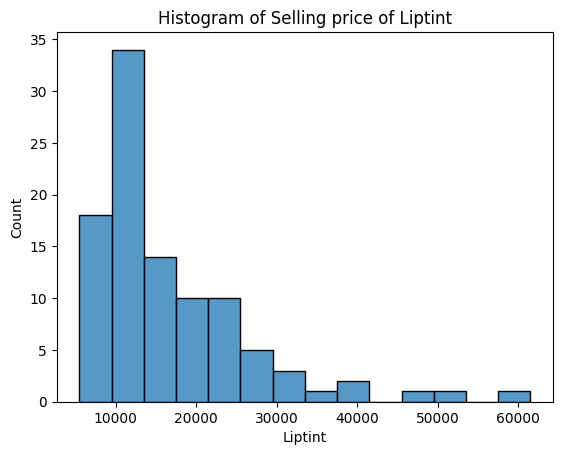

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(x='판매가', data=liptint_df)

plt.title('Histogram of Selling price of Liptint')
plt.xlabel('Liptint')
plt.show()

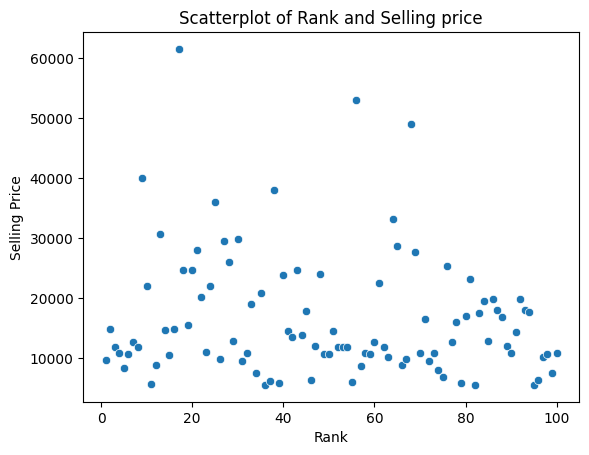

In [ ]:
sns.scatterplot(x=liptint_df.index+1, y='판매가', data=liptint_df)
plt.title('Scatterplot of Rank and Selling price')
plt.xlabel('Rank')
plt.ylabel('Selling Price')
plt.show()